Wall time: 16.7 s


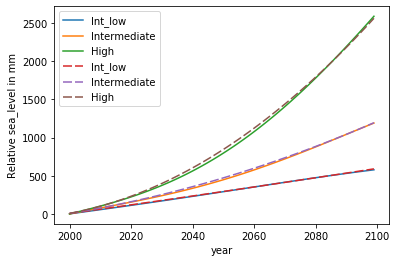

In [6]:
%%time

import numpy as np
import matplotlib.pyplot as plt



# NOAA sea level rise predictions
#input 'scale_parameter_gammadstrb'
B= 0.5;

#input 'shape_parameter_gammadstrb'
A= np.zeros((3,100))
A[0,:]=np.arange(11.2,12.388,0.012);# intermediate low rise case 
A[1,:]=np.arange(13,35,0.22);# intermediate high rise case 
A[2,:]= np.arange(14.6,88.6,0.74);# high rise case 


run=10000;
sea_level= np.zeros((100,3)); ## sea level summation for averaging
sealevel_samplerun= np.zeros((100,3)); ## sea level for a sample run

r= 0; # sea level rise for each year
for a in range(3):

	for i in range(run):
		l=0; # relative sea level, taking non zero initial value to avoid 0 at the begining
 
		for y in range(100):
			r= np.random.gamma(A[a,y],B); 
			l=l+r; ## relative sea level, but as we need the average sea level, it will be added to the next parameter
			sealevel_samplerun[y,a]=l;
			sea_level[y,a]=l+sea_level[y,a]; ## adding sea level for corresponding year to see the average for several runs

            
avg_sea_level= sea_level/run;

x = np.array([0,20,    30,   40,   50,   60,   70,   80,   90,  100]);

y1 = np.array([0,113,170.7,219.5,289.6,350.5,411.5,469.4,521.2,579.2]);
coeff1 = np.polyfit(x, y1, 4);
ffit1 = np.poly1d(coeff1);

y2 = np.array([0,150,240.8,329.2,438.9,570,710.2,859.5,1030.2,1188.7]);
coeff2 = np.polyfit(x, y2, 4);
ffit2 = np.poly1d(coeff2);

y3 = np.array([0,217,381,539.5,780.3,1060.7,1389.9,1740.4,2148.84,2590.8]);
coeff3 = np.polyfit(x, y3,4);
ffit3 = np.poly1d(coeff3);

x_new = np.linspace(x[0], x[-1], num=len(x)*10);

label= np.zeros(100);
label[0:120]= np.arange(2000,2100);

fig1 = plt.figure(1) 
#label = ('2000', '2010','2020', '2030', '2040','2050', '2060', '2070', '2080','2090', '2100')
ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(label,ffit1(x_new), label ='Int_low')  

ax1.plot(label,ffit2(x_new),label ='Intermediate')  

ax1.plot(label,ffit3(x_new),label ='High')  

ax1.plot(label,avg_sea_level[:,0],dashes=[6, 2], label='Int_low')  
ax1.plot(label,avg_sea_level[:,1],dashes=[6, 2], label='Intermediate')                                                                     
ax1.plot(label,avg_sea_level[:,2],dashes=[6, 2], label='High')                                                                     

plt.xlabel('year')
plt.ylabel('Relative sea_level in mm')
plt.legend()